Root Mean Square Error for M=0:247.0541643191767
Root Mean Square Error for M=1:211.12447248939546
Root Mean Square Error for M=2:154.8615544456756
Root Mean Square Error for M=3:96.24902022347398
Root Mean Square Error for M=4:46.02383183717053
Root Mean Square Error for M=5:22.935950053185138
Root Mean Square Error for M=6:18.149825822102095
Root Mean Square Error for M=7:18.145050251430355
Root Mean Square Error for M=8:17.97025665371971
Root Mean Square Error for M=9:16.88613992844558
Root Mean Square Error for M=10:15.031923356337714
Root Mean Square Error for M=11:14.43520019221988
Root Mean Square Error for M=12:14.190431227165373
Root Mean Square Error for M=13:12.44562579439699
Root Mean Square Error for M=14:9.098173737132752


C:\Users\rahma\AppData\Local\Temp\ipykernel_13192\1078438695.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


Root Mean Square Error for M=15:9.088296464276995
Root Mean Square Error for M=16:8.903819970784388
Root Mean Square Error for M=17:8.172395895919673
Root Mean Square Error for M=18:8.032758734543286
Root Mean Square Error for M=19:3.4338944369686755e-05
Root Mean Square Error for M=20:7.15648966042862e-05
Root Mean Square Error for M=21:8.031899199286091e-05
Root Mean Square Error for M=22:1.0678427643157234e-05
Root Mean Square Error for M=23:0.0001136633059550557
Root Mean Square Error for M=24:0.0002752588799809507


<Figure size 360x360 with 0 Axes>

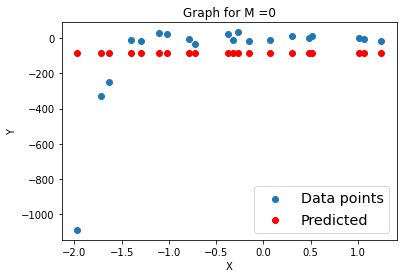

<Figure size 360x360 with 0 Axes>

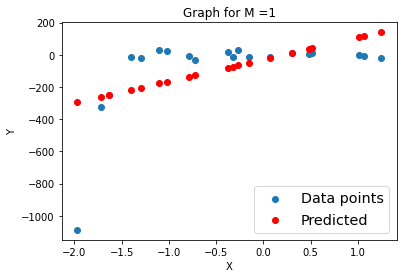

<Figure size 360x360 with 0 Axes>

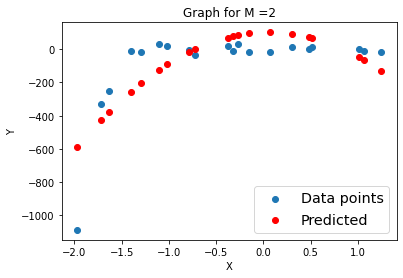

<Figure size 360x360 with 0 Axes>

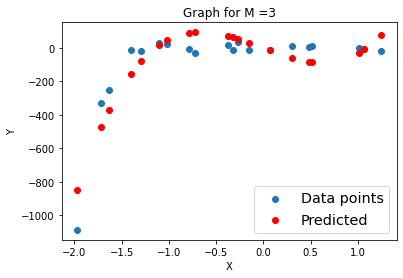

<Figure size 360x360 with 0 Axes>

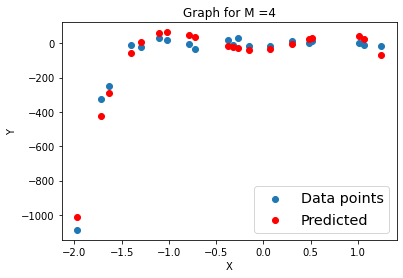

<Figure size 360x360 with 0 Axes>

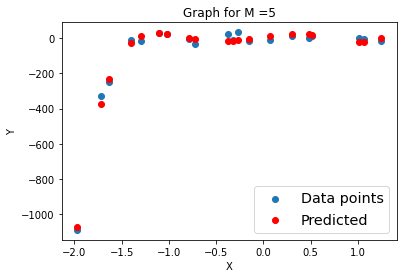

<Figure size 360x360 with 0 Axes>

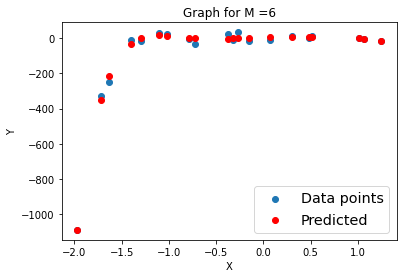

<Figure size 360x360 with 0 Axes>

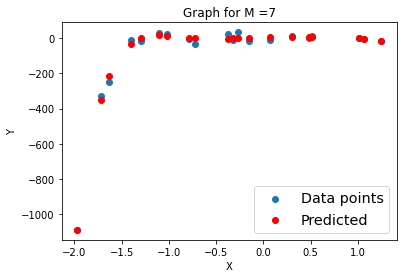

<Figure size 360x360 with 0 Axes>

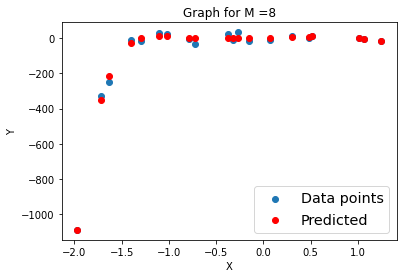

<Figure size 360x360 with 0 Axes>

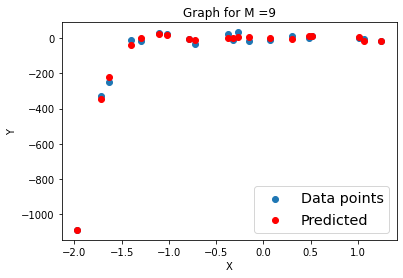

<Figure size 360x360 with 0 Axes>

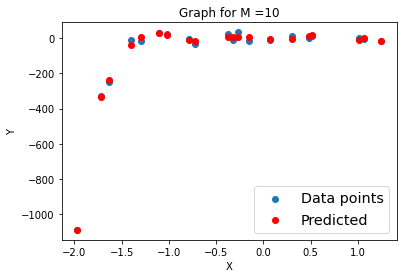

<Figure size 360x360 with 0 Axes>

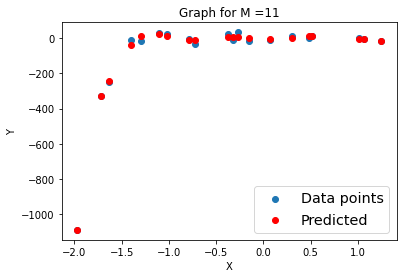

<Figure size 360x360 with 0 Axes>

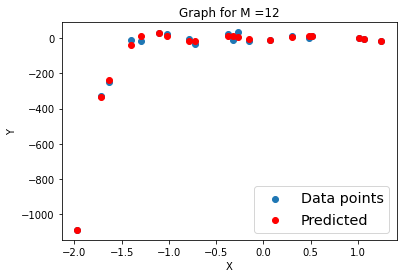

<Figure size 360x360 with 0 Axes>

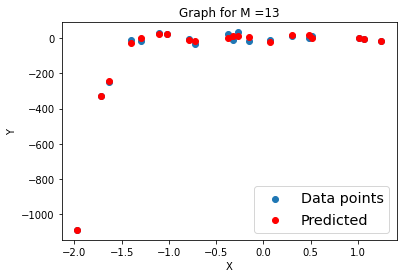

<Figure size 360x360 with 0 Axes>

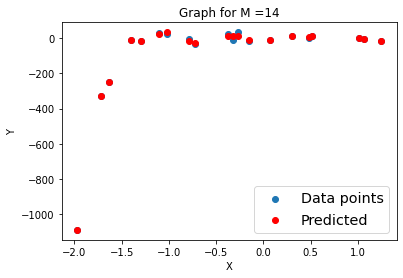

<Figure size 360x360 with 0 Axes>

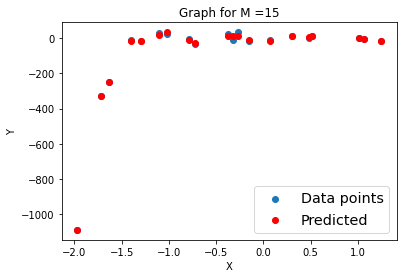

<Figure size 360x360 with 0 Axes>

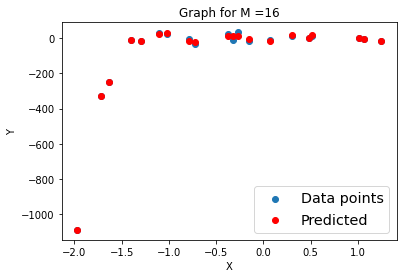

<Figure size 360x360 with 0 Axes>

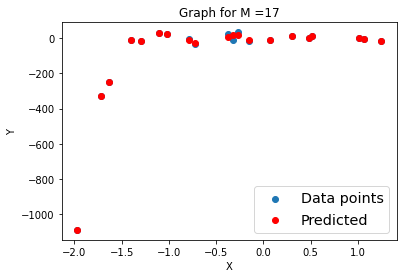

<Figure size 360x360 with 0 Axes>

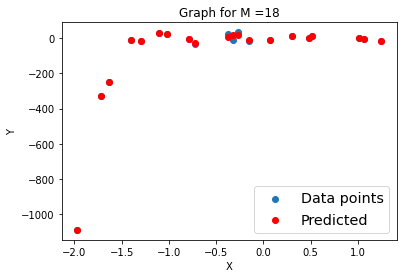

<Figure size 360x360 with 0 Axes>

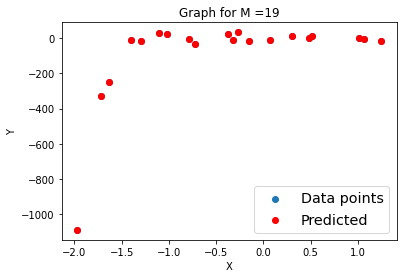

<Figure size 360x360 with 0 Axes>

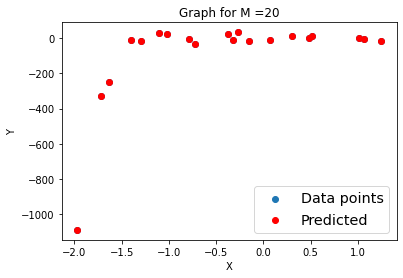

<Figure size 360x360 with 0 Axes>

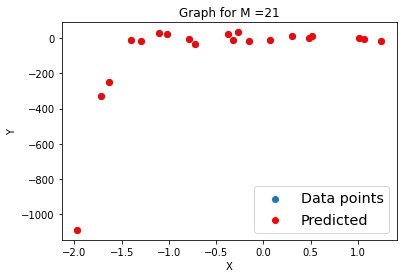

<Figure size 360x360 with 0 Axes>

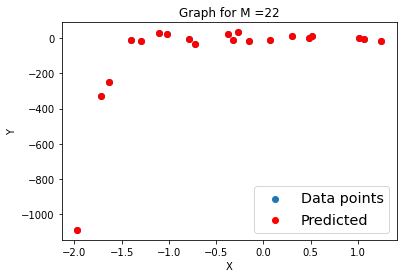

<Figure size 360x360 with 0 Axes>

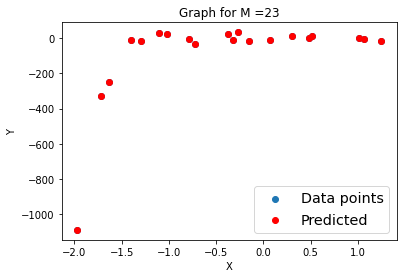

<Figure size 360x360 with 0 Axes>

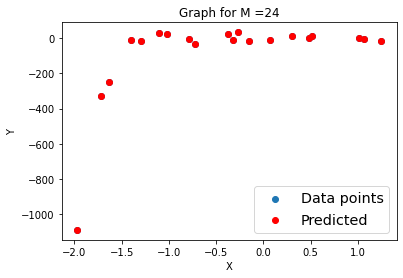

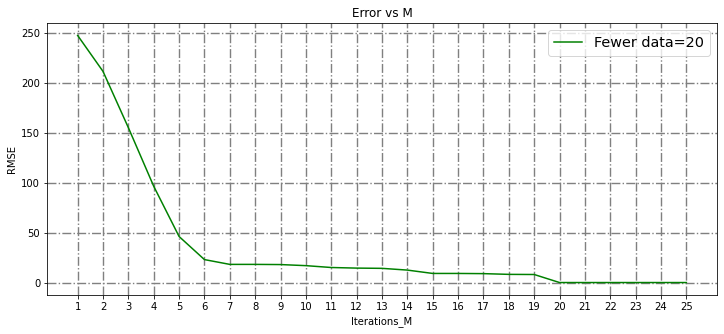

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import approx_fprime as gradient
import math
import csv
  
data_train=pd.read_csv('train_xy.csv')
data_test=pd.read_csv('test.csv')
X=data_train['x']
Y=data_train['y']
X_20=X.loc[0:19]
Y_20=Y.loc[0:19]

test_X=data_test['x']
test_Y=data_test['y']


# X_20.shape## As the dimension is 100, but linear regression trainning need atleast 1 dimension
# Y_20.shape
# X_20.ndim
# Y_20.ndim ## 1 ...Cant train linear regression model so we need to give dimension
x_train = X_20.values.reshape(-1,1)
y_train = Y_20.values.reshape(-1,1)
x_full = X.values.reshape(-1,1)
y_full = Y.values.reshape(-1,1)


x_test = test_X.values.reshape(-1,1) ## 30X1
y_test = test_Y.values.reshape(-1,1) ## 30X1


M=25 ## Just Change this M value to iterate for more higher polynomial
Mean_square_error=[]
design_matrix_20=[]
Coefficeint_20=[]
optimal_weights=[]
for i in range(M):
        polynomial_features = PolynomialFeatures(degree = i)
        X_poly = polynomial_features.fit_transform(x_train)
        design_matrix_20.append(X_poly)
        polynomial_reg_model_20=LinearRegression()
        polynomial_reg_model_20.fit(X_poly,y_train)
        Coefficeint_20.append(polynomial_reg_model_20.coef_)
        y_predicted = polynomial_reg_model_20.predict(X_poly)
        
        
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M ={i}")
        plt.scatter(X_20,Y_20,label='Data points')
        plt.xlabel("X")
        plt.ylabel("Y")
        
        plt.scatter(X_20,y_predicted,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show
        MSE = mean_squared_error(Y_20, y_predicted)
        RMSE = math.sqrt(MSE)
        Mean_square_error.append(RMSE)
        print(f"Root Mean Square Error for M={i}:{RMSE}")
        
        #Optimisation(analystical_penrose_mooresir)
        design_matrix=X_poly
        transpose=np.transpose(design_matrix)
        dot_product=(np.dot(transpose,design_matrix))
        inverse=np.linalg.inv(dot_product)
        pseudo=np.dot(inverse,transpose)
        w_ml=np.dot(transpose,Y_20)
        optimal_weights.append(w_ml)



Iterations_M= (np.linspace(1,M,num=M,dtype="int"))
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(Iterations_M, Mean_square_error, 'green',label='Fewer data=20')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

[7.5767451e-08]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

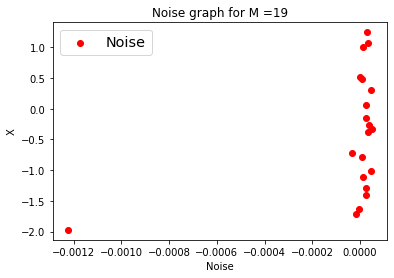

In [236]:
## Noise for overfitting case
noise19=y_train-y_predicted
noise_variance19=sum((noise19)**2)/20
rounded_noise=np.round(noise_variance19,5)
print(noise_variance19)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.title(f"Noise graph for M ={19}")
plt.xlabel("Noise")
plt.ylabel("X")
plt.scatter(noise19,X_20,label='Noise',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

Root Mean Square Error for M=0:298.8398296781834
Root Mean Square Error for M=1:237.58781279272927
Root Mean Square Error for M=2:231.6178705136389
Root Mean Square Error for M=3:98.3836525965776
Root Mean Square Error for M=4:95.48674442022723
Root Mean Square Error for M=5:25.514474057246286
Root Mean Square Error for M=6:25.51339401238804
Root Mean Square Error for M=7:19.080837936561306
Root Mean Square Error for M=8:18.896599506145428
Root Mean Square Error for M=9:18.44095661320482
Root Mean Square Error for M=10:18.426066987822978
Root Mean Square Error for M=11:18.292977625412664


C:\Users\rahma\AppData\Local\Temp\ipykernel_13192\439189069.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


Root Mean Square Error for M=12:18.129167959353495
Root Mean Square Error for M=13:18.097740132228925
Root Mean Square Error for M=14:17.98890521328133
Root Mean Square Error for M=15:17.701502469764975
Root Mean Square Error for M=16:17.636264919084795
Root Mean Square Error for M=17:17.631992921648482
Root Mean Square Error for M=18:17.14342606527487
Root Mean Square Error for M=19:17.123503722628623
Root Mean Square Error for M=20:16.99851002074796
Root Mean Square Error for M=21:16.07430526804454
Root Mean Square Error for M=22:16.034051311642276
Root Mean Square Error for M=23:15.995425903361317
Root Mean Square Error for M=24:15.99527941942065


<Figure size 360x360 with 0 Axes>

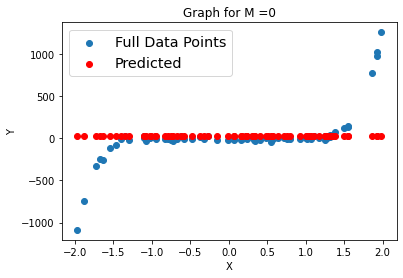

<Figure size 360x360 with 0 Axes>

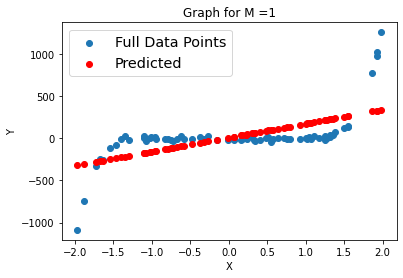

<Figure size 360x360 with 0 Axes>

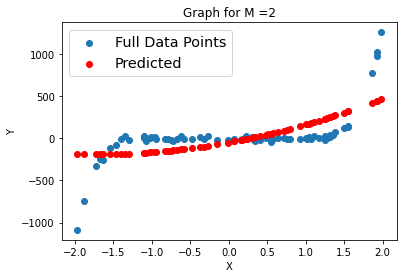

<Figure size 360x360 with 0 Axes>

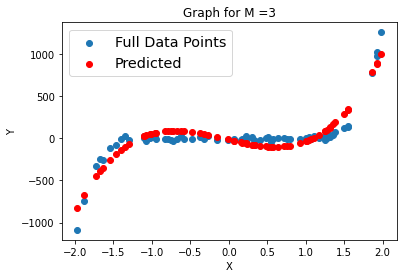

<Figure size 360x360 with 0 Axes>

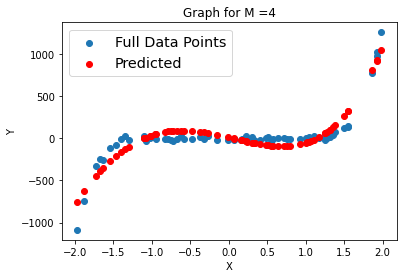

<Figure size 360x360 with 0 Axes>

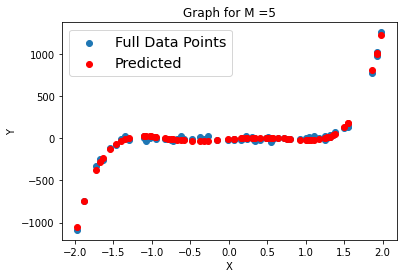

<Figure size 360x360 with 0 Axes>

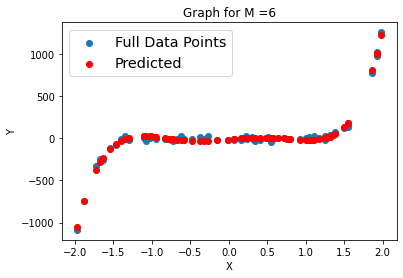

<Figure size 360x360 with 0 Axes>

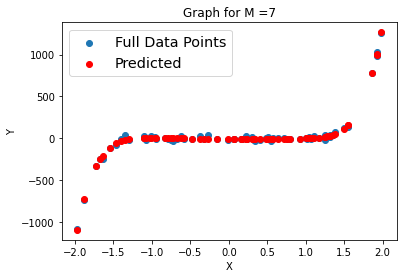

<Figure size 360x360 with 0 Axes>

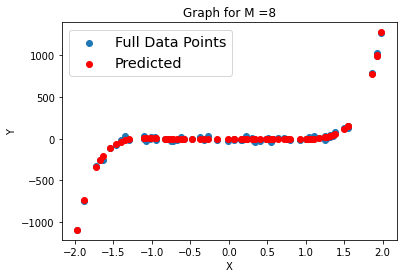

<Figure size 360x360 with 0 Axes>

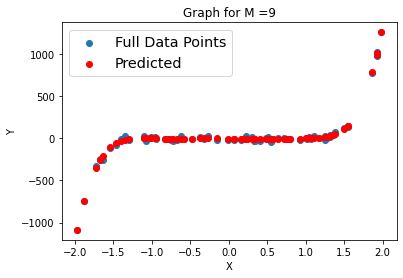

<Figure size 360x360 with 0 Axes>

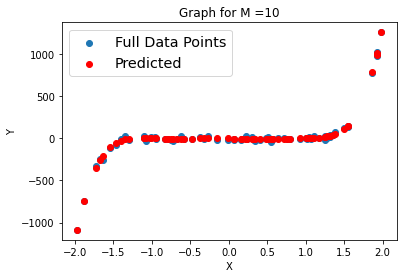

<Figure size 360x360 with 0 Axes>

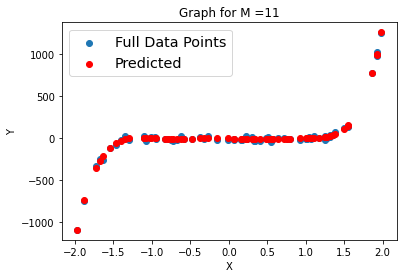

<Figure size 360x360 with 0 Axes>

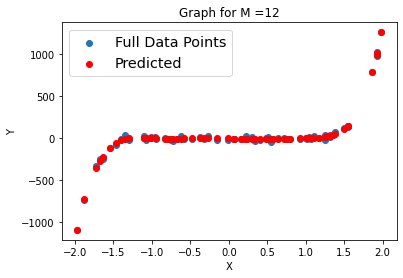

<Figure size 360x360 with 0 Axes>

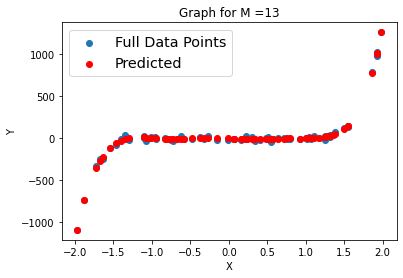

<Figure size 360x360 with 0 Axes>

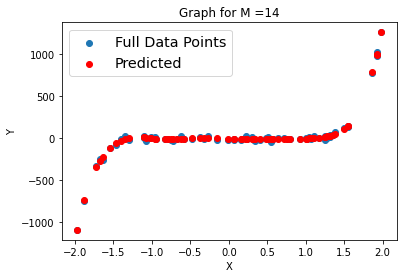

<Figure size 360x360 with 0 Axes>

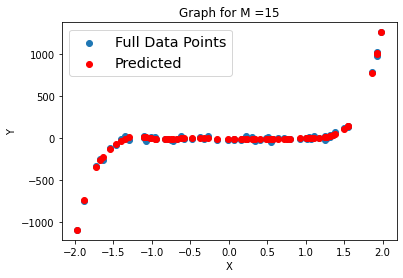

<Figure size 360x360 with 0 Axes>

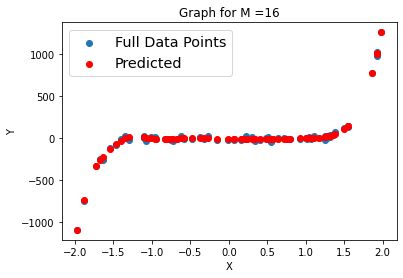

<Figure size 360x360 with 0 Axes>

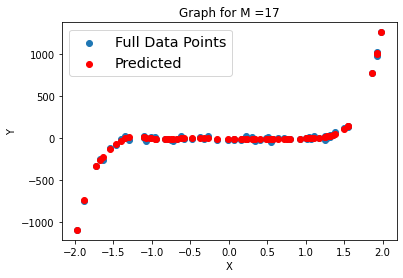

<Figure size 360x360 with 0 Axes>

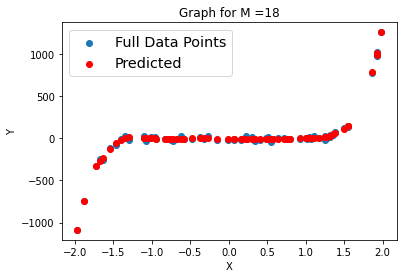

<Figure size 360x360 with 0 Axes>

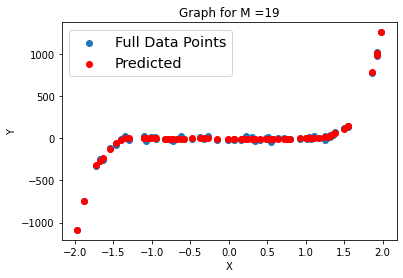

<Figure size 360x360 with 0 Axes>

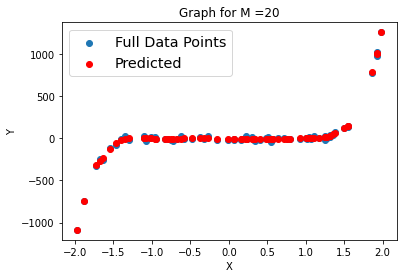

<Figure size 360x360 with 0 Axes>

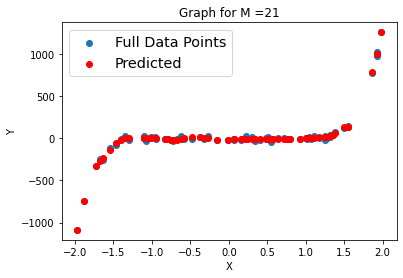

<Figure size 360x360 with 0 Axes>

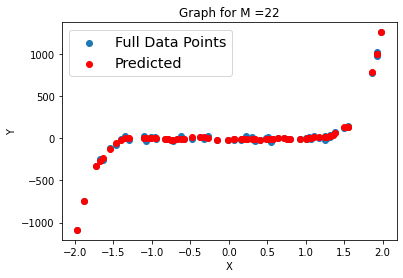

<Figure size 360x360 with 0 Axes>

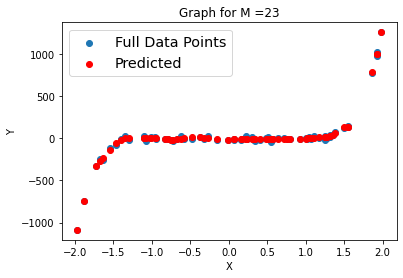

<Figure size 360x360 with 0 Axes>

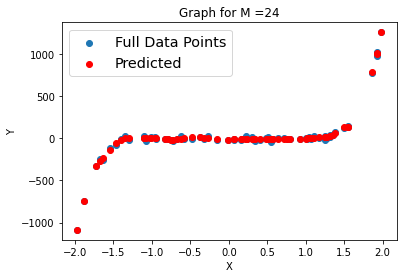

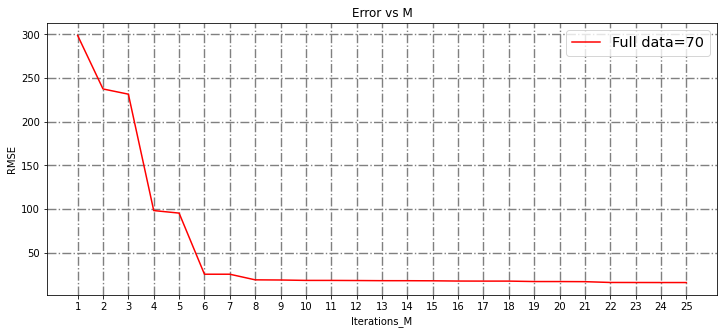

In [237]:
M=25
Mean_square_error_full=[]
design_matrix_70=[]
Coefficeint_70=[]

for i in range(M):
        polynomial_features = PolynomialFeatures(degree = i)
        X_poly_full = polynomial_features.fit_transform(x_full)
        
        polynomial_reg_model_70=LinearRegression()
        polynomial_reg_model_70.fit(X_poly_full,y_full)
        y_predicted_full = polynomial_reg_model_70.predict(X_poly_full)
        design_matrix_70.append(X_poly_full)
        Coefficeint_70.append( polynomial_reg_model_70.coef_)
        
        plt.figure(figsize=(5,5))
        fig, ax = plt.subplots()
        plt.title(f"Graph for M ={i}")
        plt.scatter(X,Y,label='Full Data Points')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.scatter(X,y_predicted_full,label='Predicted',c="red")
        legend = ax.legend(loc='best', fontsize='x-large')
        plt.show
        MSE_full = mean_squared_error(Y, y_predicted_full)
        RMSE = math.sqrt(MSE_full)
        Mean_square_error_full.append(RMSE)
        print(f"Root Mean Square Error for M={i}:{RMSE}")
Iterations_M_full= (np.linspace(1,M,num=M,dtype="int"))
fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(Iterations_M_full, Mean_square_error_full, 'red',label='Full data=70')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

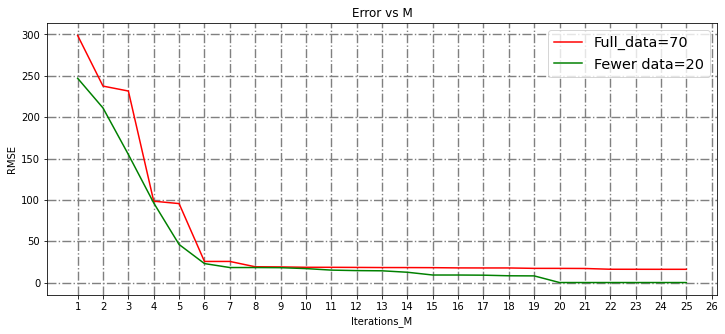

In [238]:

fig, ax = plt.subplots(figsize = (12, 5))
plt.plot(Iterations_M_full, Mean_square_error_full, 'red',label='Full_data=70')
plt.plot(Iterations_M, Mean_square_error, 'green',label='Fewer data=20')
plt.title("Error vs M")
plt.xlabel('Iterations_M')
plt.ylabel('RMSE')
M=26
plt.xticks(np.arange(1,M+1))
plt.grid(True, color = "grey", linewidth = "1.4", linestyle = "-.") 
legend = ax.legend(loc='best', fontsize='x-large')
plt.show()

In [239]:
with open('1A_Design_matrix_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(design_matrix_20)

with open('1A_Coefficient_20', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(Coefficeint_20)

with open('1A_Design_matrix_70', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(design_matrix_70)


with open('1A_Coefficient_70', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
   
    write.writerows(Coefficeint_70)

In [175]:

data = np.array(data_train.values)
# norm = np.linalg.norm(data[:, 0:1])
# data[:, 0:1] = data[:, 0:1]/norm
# v = data[:, 0:1]
# kk = ((v - v.min()) / (v.max() - v.min()))
# data[:, 0:1] = kk - np.mean(kk)
# Convert everything to a numpy array, as it makes my life easy. Works pretty much like MATLAB after that
train_split = 0.8
train_X_st = data[:int(train_split*len(data_train)), 0:1].reshape(-1,1)
train_y_st = data[:int(train_split*len(data_train)), 1:].reshape(-1,1)
test_X_st = data[int(train_split*len(data_train)):, 0:1]
test_y_st = data[int(train_split*len(data_train)):, 1:]
print(train_X_st.shape)

(56, 1)


In [176]:
class polynomial_regression():


    def __init__(self,degrees):
        self.degree = degrees
        self.weights = np.random.randn(degrees+1)
        self.training_loss = []
        self.loss_type = None


    def predict(self, x: float):
        output = 0

        for i in range(len(self.weights)-1):
            output += (x**(i+1) * self.weights[i])

        return output + self.weights[-1]


    def fit(self,X ,y ,epochs,lr,loss,ridge=False,reg_rate=0.1):

        training_loss = []

        if loss == 'MSE':
            loss = MSE
            self.loss_type = 'MSE'
        elif loss == 'RMSE':
            loss = RMSE
            self.loss_type = 'RMSE'
        else:
            raise Exception('Undefined loss function')


        for epoch in range(epochs):
           
            self.weights -= lr*gradient(self.weights,
                                        RMSE,
                                        [np.sqrt(np.finfo(float).eps)/100]*len(self.weights),
                                        X,
                                        y,
                                        ridge,
                                        reg_rate
                                       )
            training_loss.append(MSE(self.weights,X,y))
            # print(epoch,training_loss)

        self.training_loss = training_loss
        # print(self.weights)

def MSE(w,X,y,ridge=False,reg_rate=0.1):
    total = 0
    weights = w[:-1]
    bias = w[-1]

    for i in range(len(X)):
        total += (np.dot(weights,[X[i]**(p+1) for p in range(len(weights))]) + bias - y[i])**2

    if ridge == False:
        return (1/len(X)) * total
    else:
        return (1/len(X)) * total + reg_rate*((w**2).sum())


def RMSE(w,X,y,ridge=False, reg_rate = 0.1):
    total = 0
    weights = w[:-1]
    bias = w[-1]

    for i in range(len(X)):
        total += (np.dot(weights,[X[i]**(p+1) for p in range(len(weights))]) + bias - y[i])**2

    if ridge == False:
        return np.sqrt((1/len(X)) * total)

    else:
        return np.sqrt((1/len(X)) * total) + reg_rate*((w**2).sum())


def build_graph_trainning(X,y,model):
    plt.figure(figsize=(10,4))

    #Scatter plot of the dataset and the plot of the model's predictions
    plt.subplot(1,2,1)
    plt.scatter(X,y)
    X.sort()
    plt.scatter(X,model.predict(X),c='red')
    plt.title('Model',size=20)
    plt.show
    #Curve of the training loss
    plt.subplot(1,2,2)
    plt.plot(np.arange(len(model.training_loss)),model.training_loss,label=f'{model.loss_type} loss')
    plt.legend(prop={'size': 20})
    plt.title('Training loss',size=20)

def build_graph_test(X,y,model):
    plt.figure(figsize=(10,4))

    #Scatter plot of the dataset and the plot of the model's predictions
    plt.subplot(1,2,1)
    plt.scatter(X,y)
    X.sort()
    plt.scatter(X,model.predict(X),c='red')
    plt.title('Model_test prediction',size=20)
    plt.show
   

In [179]:
epoch_Iter=np.linspace(1000,2000,10)
epoch_Iter
iteration_epoch=[]
for i in (epoch_Iter):
        print(int(i))
        iteration_epoch.append(int(i))

1000
1111
1222
1333
1444
1555
1666
1777
1888
2000


1000
1111
1222
1333
1444
1555
1666
1777
1888
2000


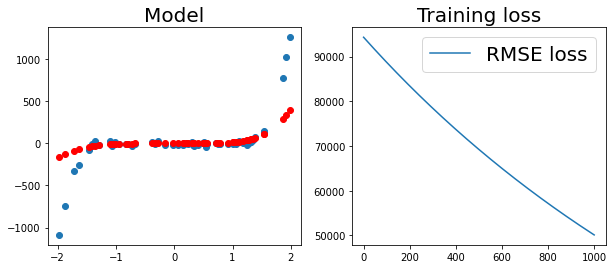

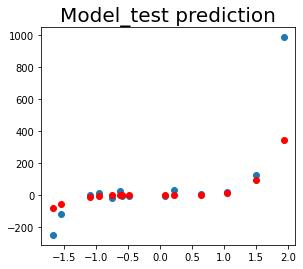

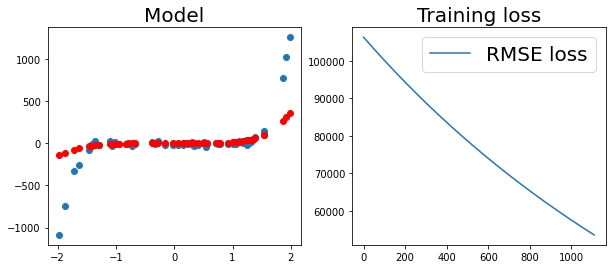

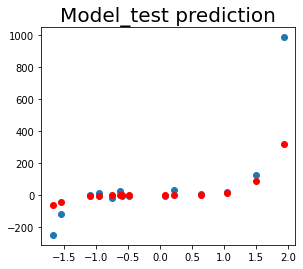

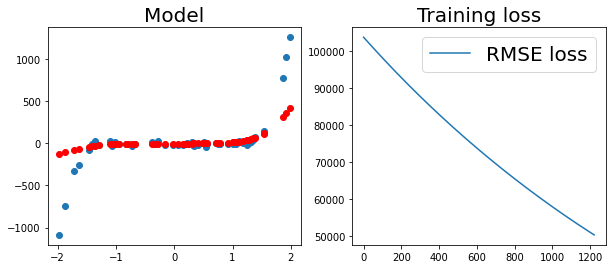

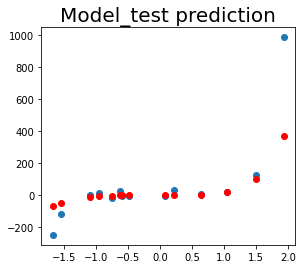

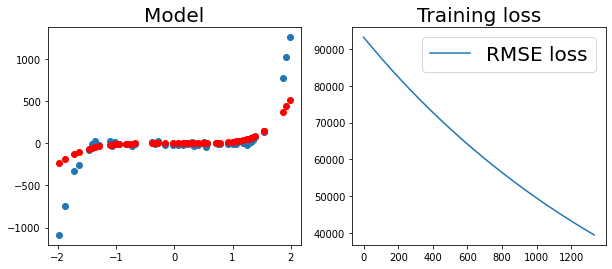

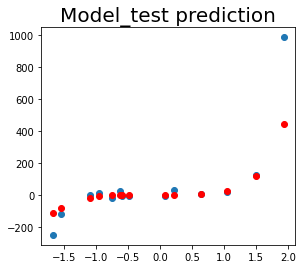

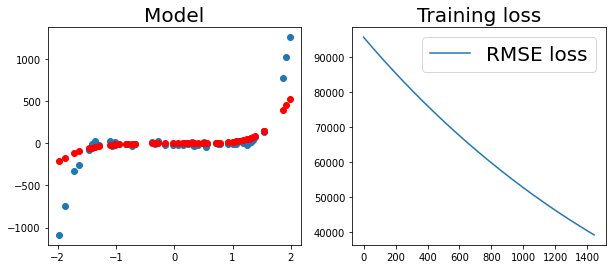

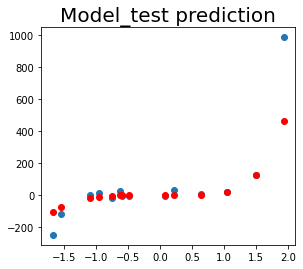

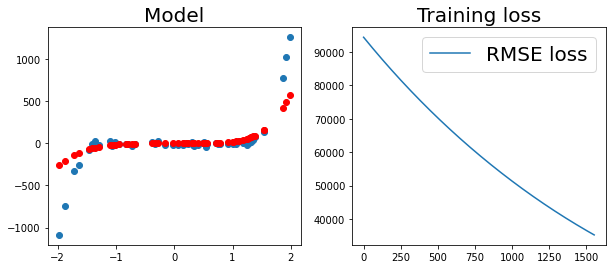

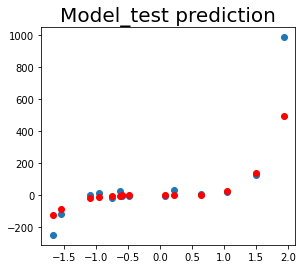

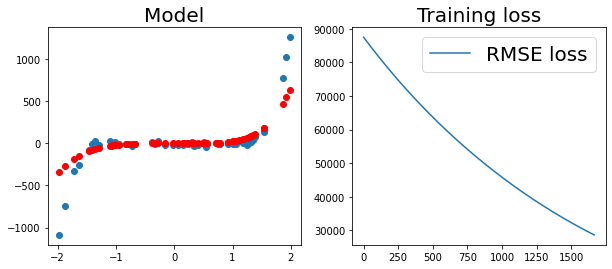

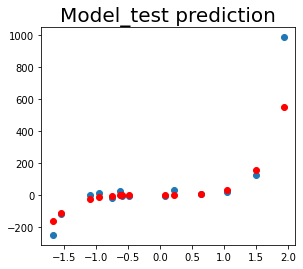

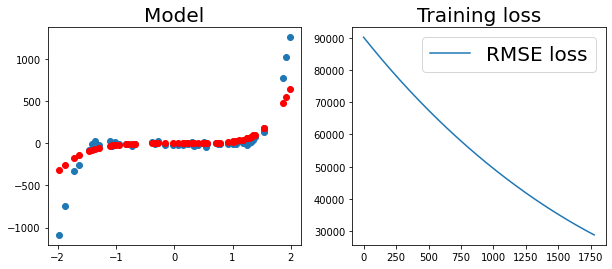

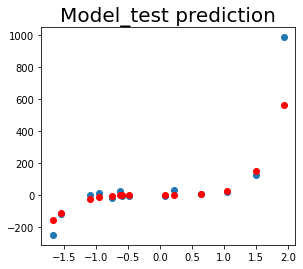

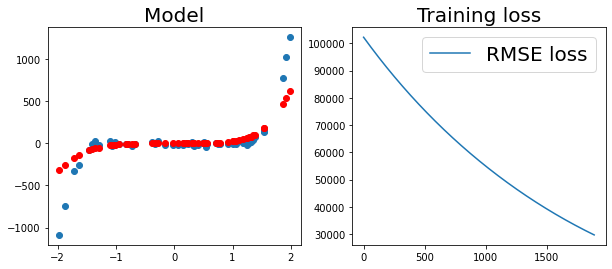

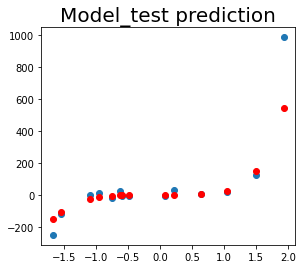

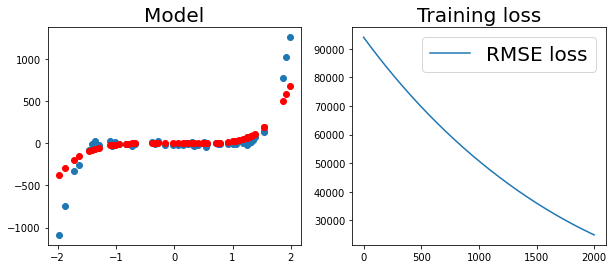

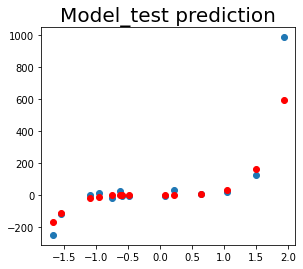

In [180]:
for i in iteration_epoch:
        degree = 6
        epochs = i
        print(i)
        learning_rate = 0.001


        model = polynomial_regression(degree)
        model.fit(train_X_st,
                train_y_st,
                epochs,
                learning_rate,
                loss='RMSE',
                ridge=False,)
        build_graph_trainning(train_X_st,train_y_st,model)
        build_graph_test(test_X_st,test_y_st,model)

[27879.3941408]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

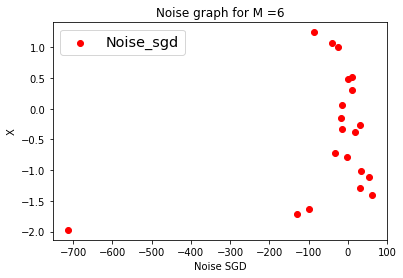

In [184]:
## Noise for overfitting case
noise_sgd=y_train-model.predict(x_train)
noise_variance_sgd=sum((noise_sgd)**2)/20
rounded_noise_sgd=np.round(noise_variance_sgd,5)
print(noise_variance_sgd)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.title(f"Noise graph for M ={6}")
plt.xlabel("Noise SGD")
plt.ylabel("X")
plt.scatter(noise_sgd,X_20,label='Noise_sgd',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show

In [211]:
# holds  70 data points
p = int(len(x_full)*9/10)
data = np.arange(p)
#shuffles the data 
np.random.shuffle(data)

In [212]:
def stochastic_gradient_descent(eta,m,lamb,max_iter,batch_size,col_x,col_t):
    #constructing design_matrix
    P  = design_matrix(col_x,m)
    #initializing matrix with all zeros
    weight = np.zeros((m+1,1))
    
    for i in range(max_iter):
        iter = 0
        for j in range(batch_size):
          y = col_t[data[j]]
          x = P[data[j]] 
          r = x*weight
          iter = iter  + (x.T)*(y-r)
          weight = weight + iter*eta  
        weight = weight + lamb*weight*eta  
    return weight

In [213]:
def design_matrix(x,m):
    n = len(x)
    
    #initializing matrix with all zeros
    Pi = np.matrix(np.zeros((n,m+1),dtype=float))
    
    for j in range(n): 
      for i in range(m+1):
        Pi[j,i] = (x[j])**i
    return Pi

def error(m,cofficent,x,t):
    tp   = result(m,cofficent,x)
    test = np.square((np.subtract(t,tp)))
    Erms = ((np.sum(test))/len(t))**0.5
    return Erms

def result(m,cofficient,col_x):

    return (np.matmul(design_matrix(col_x,m),cofficient))

In [230]:
weight=stochastic_gradient_descent(1/1000,5,10**-20,4000,4,x_full,y_full)
weight

matrix([[  6.22270345],
        [-50.10391511],
        [-47.83719754],
        [-40.34075505],
        [ 20.6127126 ],
        [ 51.0275678 ]])

C:\Users\rahma\AppData\Local\Temp\ipykernel_13192\2984253157.py:14: RuntimeWarning: overflow encountered in square
  test = np.square((np.subtract(t,tp)))
C:\Users\rahma\AppData\Local\Temp\ipykernel_13192\2816482029.py:14: RuntimeWarning: invalid value encountered in add
  weight = weight + iter*eta
C:\Users\rahma\AppData\Local\Temp\ipykernel_13192\2816482029.py:13: RuntimeWarning: overflow encountered in add
  iter = iter  + (x.T)*(y-r)
C:\Users\rahma\AppData\Local\Temp\ipykernel_13192\2816482029.py:13: RuntimeWarning: invalid value encountered in add
  iter = iter  + (x.T)*(y-r)


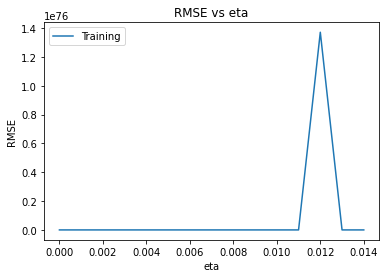

In [223]:
maty = np.zeros((100,2))
for i in range(100):
    maty[i][0] = i/1000
    maty[i][1]=  error(4,stochastic_gradient_descent(i/1000,4,10**-20,4000,4,x_full,y_full),x_full,y_full)
    
fig = plt.figure(5)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('eta')
plt.ylabel('RMSE')
plt.title('RMSE vs eta')
plt.legend()
plt.show()

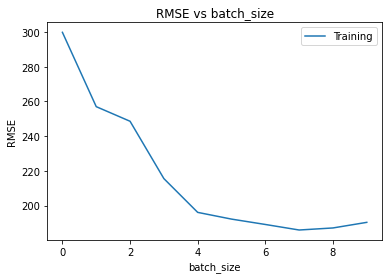

In [222]:
maty = np.zeros((10,2))
for i in range(10):
    maty[i][0] = i
    maty[i][1]=  error(3,stochastic_gradient_descent(0.001,3,10**-20,5000,i,x_full,y_full),x_full,y_full)
    
fig = plt.figure(6)
plt.plot(maty[:,0:1],maty[:,1:2],label = 'Training')
plt.xlabel('batch_size')
plt.ylabel('RMSE')
plt.title('RMSE vs batch_size')
plt.legend()
plt.show()

[[  71871.04174528]
 [  79231.12448166]
 [  77563.05498275]
 [  81987.16398297]
 [  73775.92000107]
 [  75180.86638157]
 [ 172810.9862674 ]
 [  72096.26509221]
 [  73268.46092698]
 [  82464.57952422]
 [  72570.87134025]
 [1642972.53086278]
 [  72649.20063612]
 [  74604.10845285]
 [  72316.65066135]
 [  71546.23008859]
 [ 121702.90272317]
 [  70031.99762925]
 [  77491.55660134]
 [  79139.0983295 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 720x720 with 0 Axes>

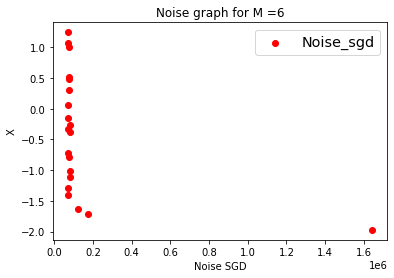

In [234]:
## Noise for overfitting case
noise_sgd_batch=y_train-list(result(6,weight,x_test))
noise_variance_sgd_batch=sum((noise_sgd_batch)**2)/20
rounded_noise_sgd_batch=np.round(noise_variance_sgd_batch,5)
print(noise_variance_sgd_batch)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
plt.title(f"Noise graph for M ={6}")
plt.xlabel("Noise SGD")
plt.ylabel("X")
plt.scatter(noise_variance_sgd_batch,X_20,label='Noise_sgd',c="red")
legend = ax.legend(loc='best', fontsize='x-large')
plt.show